# Lab: 1

Bias–variance trade-off.

Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


Create the Dataset

In [3]:
# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([52, 55, 61, 70, 82])

Model A – Simple Linear Regression

In [4]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Coefficients
beta_0 = linear_model.intercept_
beta_1 = linear_model.coef_[0]

print("Linear Regression Equation:")
print(f"y = {beta_0:.2f} + {beta_1:.2f}x")


Linear Regression Equation:
y = 41.50 + 7.50x


Model B – Polynomial Regression (Degree 4)

In [6]:
# Polynomial Features (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

print("\nPolynomial Regression Coefficients:")
for i, coef in enumerate(poly_model.coef_):
    print(f"w{i} = {coef:.4f}")
print(f"w0 (Intercept) = {poly_model.intercept_:.4f}")



Polynomial Regression Coefficients:
w0 = 0.0000
w1 = -1.5000
w2 = 1.5000
w3 = -0.0000
w4 = 0.0000
w0 (Intercept) = 52.0000


Prediction for x = 6

In [7]:
x_test = np.array([[6]])

# Linear prediction
y_pred_linear = linear_model.predict(x_test)

# Polynomial prediction
x_test_poly = poly.transform(x_test)
y_pred_poly = poly_model.predict(x_test_poly)

print("\nPredictions for x = 6:")
print(f"Linear Model Prediction: {y_pred_linear[0]:.2f}")
print(f"Polynomial Model Prediction: {y_pred_poly[0]:.2f}")



Predictions for x = 6:
Linear Model Prediction: 86.50
Polynomial Model Prediction: 97.00


Training Error (MSE)

In [8]:
# Training predictions
y_train_pred_linear = linear_model.predict(X)
y_train_pred_poly = poly_model.predict(X_poly)

# Mean Squared Error
mse_linear = mean_squared_error(y, y_train_pred_linear)
mse_poly = mean_squared_error(y, y_train_pred_poly)

print("\nTraining Mean Squared Error:")
print(f"Linear Model MSE: {mse_linear:.4f}")
print(f"Polynomial Model MSE: {mse_poly:.6f}")



Training Mean Squared Error:
Linear Model MSE: 6.3000
Polynomial Model MSE: 0.000000


Visualization 

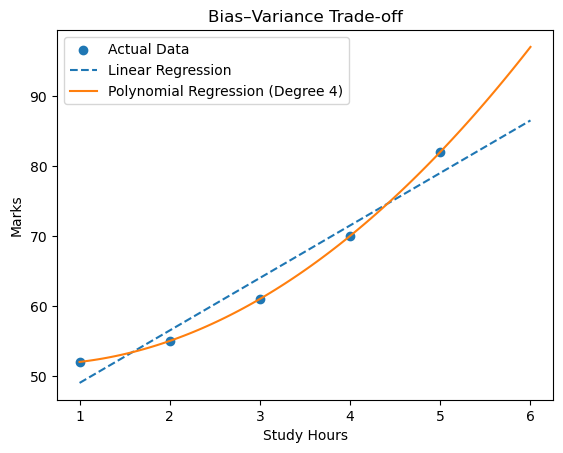

In [9]:
# Plot data and models
X_plot = np.linspace(1, 6, 100).reshape(-1, 1)

plt.scatter(X, y, label="Actual Data")

plt.plot(X_plot, linear_model.predict(X_plot),
         label="Linear Regression", linestyle="--")

plt.plot(X_plot, poly_model.predict(poly.transform(X_plot)),
         label="Polynomial Regression (Degree 4)")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.legend()
plt.title("Bias–Variance Trade-off")
plt.show()
